<a href="https://colab.research.google.com/github/tbazzi/Data-Science---Fullstack-Bootcamp/blob/master/S7_2_2_Caltech101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CalTech 101

Maintenant que nous avons appris à faire du Transfer Learning, tentons de l'utiliser sur des Datasets plus grands. Nous allons pour cela étudier le dataset [CalTech101](http://www.vision.caltech.edu/Image_Datasets/Caltech101/)  qui recence 40 à 800 images de 101 catégories. 

* Importez les librairies classiques 
  * Tensorflow 2.0
  * Numpy 
  * Matplotlib

In [5]:
!pip install tensorflow-gpu==2.0.0beta1
import tensorflow as tf 
import numpy as np 
import matplotlib.pyplot as plt 

* Importez le dossier `101_ObjectCategories.tar.gz`

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!mkdir 101_ObjectCategories
!tar -xzvf /content/drive/My\ Drive/101_ObjectCategories.tar.gz -C ./101_ObjectCategories

Saving 101_ObjectCategories.tar.gz to 101_ObjectCategories.tar.gz


* En utilisant la librairie [tarfile](https://docs.python.org/3/library/tarfile.html), extrayez les données du dossier compressé. 

* En utilisant [pathlib](https://docs.python.org/3/library/pathlib.html), créez un chemin vers le dossier `101_ObjectCategories`

In [6]:
from pathlib import Path
path = Path('/content/101_ObjectCategories/101_ObjectCategories/')
path

PosixPath('/content/101_ObjectCategories/101_ObjectCategories')

* Convertissez chacun des chemins des images en `string`

In [7]:
all_image_paths = [str(img_path) for img_path in list(path.glob("*/*"))]
all_image_paths[:5]

['/content/101_ObjectCategories/101_ObjectCategories/electric_guitar/image_0045.jpg',
 '/content/101_ObjectCategories/101_ObjectCategories/electric_guitar/image_0011.jpg',
 '/content/101_ObjectCategories/101_ObjectCategories/electric_guitar/image_0069.jpg',
 '/content/101_ObjectCategories/101_ObjectCategories/electric_guitar/image_0052.jpg',
 '/content/101_ObjectCategories/101_ObjectCategories/electric_guitar/image_0054.jpg']

['/content/101_ObjectCategories/cellphone/image_0056.jpg',
 '/content/101_ObjectCategories/cellphone/image_0044.jpg',
 '/content/101_ObjectCategories/cellphone/image_0003.jpg',
 '/content/101_ObjectCategories/cellphone/image_0047.jpg',
 '/content/101_ObjectCategories/cellphone/image_0024.jpg']

* En utilisant[ tf.io.read_file](https://www.tensorflow.org/api_docs/python/tf/io/read_file), convertissez chacun des chemin en bytes

In [0]:
all_image_bytes = [tf.io.read_file(path) for path in all_image_paths]

* Enfin convertissez les bytes en Tenseurs en utilisant [tf.io.decode_jpeg](https://www.tensorflow.org/api_docs/python/tf/io/decode_jpeg)

In [0]:
all_image_tensors = [tf.image.decode_jpeg(img_byte) for img_byte in all_image_bytes]

* Créez un moyen de visualiser des images aléatoires de votre dataset. ATTENTION : Certaines images sont en noir & blanc d'autres en couleur

In [27]:
all_image_tensors[21].shape

TensorShape([186, 300, 3])

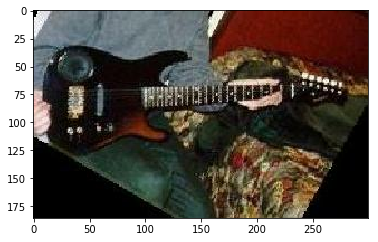

In [13]:
plt.imshow(all_image_tensors[21])

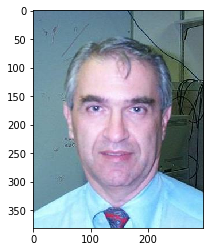

* Nous allons maintenant insérer nos données dans un [`tf.data.Dataset`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset). Insérez donc vos `paths` dans un `tf.data.Dataset`

In [0]:
tf_train_set = tf.data.Dataset.from_tensor_slices(all_image_paths)

* Créez une fonction `load_and_preprocess_images` qui s'occupera de faire le même preprocessing que plus haut et de faire votre _data augmentation_ 

In [0]:
def load_and_preprocess_images(img):
  img = tf.io.read_file(img)
  img = tf.image.decode_jpeg(img, channels=3)
  img = tf.image.resize(img, [224, 224])
  img = tf.image.random_flip_left_right(img)
  img = tf.image.random_contrast(img, 0.50, 0.90)
  img = img / 255.0
  
  return img

* Appliquez votre fonction sur votre dataset en utilisant [`.map()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#map)

In [0]:
tf_train_set = tf_train_set.map(load_and_preprocess_images)

* Créez une liste contenant tous les noms des dossiers (e.g  vos _targets_)

In [13]:
labels = []
for a in path.iterdir():
  labels += [a.name]
  
labels

['electric_guitar',
 'Motorbikes',
 'scissors',
 'lamp',
 'dragonfly',
 'sea_horse',
 'car_side',
 'hawksbill',
 'pyramid',
 'bonsai',
 'lobster',
 'ferry',
 'accordion',
 'crab',
 'cougar_body',
 'mandolin',
 'crocodile',
 'Faces_easy',
 'cellphone',
 'butterfly',
 'strawberry',
 'flamingo_head',
 'pizza',
 'stapler',
 'anchor',
 'octopus',
 'chair',
 'windsor_chair',
 'headphone',
 'bass',
 'gramophone',
 'cannon',
 'nautilus',
 'llama',
 'wild_cat',
 'starfish',
 'tick',
 'Faces',
 'Leopards',
 'wheelchair',
 'brain',
 'umbrella',
 'camera',
 'lotus',
 'chandelier',
 'minaret',
 'airplanes',
 'kangaroo',
 'platypus',
 'hedgehog',
 'stop_sign',
 'inline_skate',
 'rooster',
 'ant',
 'emu',
 'binocular',
 'dollar_bill',
 'metronome',
 'dolphin',
 'laptop',
 'gerenuk',
 'mayfly',
 'saxophone',
 'barrel',
 'helicopter',
 'schooner',
 'garfield',
 'pigeon',
 'brontosaurus',
 'ewer',
 'menorah',
 'crocodile_head',
 'cougar_face',
 'revolver',
 'panda',
 'crayfish',
 'joshua_tree',
 'okapi'

['cellphone',
 'lotus',
 'bass',
 'cougar_body',
 'kangaroo',
 'gramophone',
 'tick',
 'chandelier',
 'pagoda',
 'platypus',
 'dolphin',
 'Faces_easy',
 'metronome',
 'scorpion',
 'yin_yang',
 'minaret',
 'bonsai',
 'inline_skate',
 'accordion',
 'electric_guitar',
 'brain',
 'Motorbikes',
 'laptop',
 'menorah',
 'okapi',
 'rooster',
 'mayfly',
 'cougar_face',
 'water_lilly',
 'stop_sign',
 'flamingo_head',
 'starfish',
 'Leopards',
 'snoopy',
 'mandolin',
 'cup',
 'cannon',
 'crocodile_head',
 'grand_piano',
 'binocular',
 'soccer_ball',
 'butterfly',
 'flamingo',
 'lobster',
 'panda',
 'lamp',
 'stegosaurus',
 'hawksbill',
 'octopus',
 'ferry',
 'barrel',
 'crayfish',
 'camera',
 'ceiling_fan',
 'headphone',
 'trilobite',
 'airplanes',
 'crocodile',
 'wheelchair',
 'brontosaurus',
 'anchor',
 'schooner',
 'dalmatian',
 'dollar_bill',
 'garfield',
 'sea_horse',
 'sunflower',
 'nautilus',
 'helicopter',
 'saxophone',
 'watch',
 'gerenuk',
 'ewer',
 'wrench',
 'chair',
 'beaver',
 'car_

* Créez maintenant un dictionnaire qui aura la structure suivante : 

{*label*: *index*} ---> ex : {*buddha*: 10}

In [14]:
label_index = {}

for i, label in enumerate(labels):
  label_index[label]= i
  
label_index  

{'BACKGROUND_Google': 98,
 'Faces': 37,
 'Faces_easy': 17,
 'Leopards': 38,
 'Motorbikes': 1,
 'accordion': 12,
 'airplanes': 46,
 'anchor': 24,
 'ant': 53,
 'barrel': 63,
 'bass': 29,
 'beaver': 78,
 'binocular': 55,
 'bonsai': 9,
 'brain': 40,
 'brontosaurus': 68,
 'buddha': 96,
 'butterfly': 19,
 'camera': 42,
 'cannon': 31,
 'car_side': 6,
 'ceiling_fan': 101,
 'cellphone': 18,
 'chair': 26,
 'chandelier': 44,
 'cougar_body': 14,
 'cougar_face': 72,
 'crab': 13,
 'crayfish': 75,
 'crocodile': 16,
 'crocodile_head': 71,
 'cup': 81,
 'dalmatian': 99,
 'dollar_bill': 56,
 'dolphin': 58,
 'dragonfly': 4,
 'electric_guitar': 0,
 'elephant': 84,
 'emu': 54,
 'euphonium': 88,
 'ewer': 69,
 'ferry': 11,
 'flamingo': 97,
 'flamingo_head': 21,
 'garfield': 66,
 'gerenuk': 60,
 'gramophone': 30,
 'grand_piano': 89,
 'hawksbill': 7,
 'headphone': 28,
 'hedgehog': 49,
 'helicopter': 64,
 'ibis': 87,
 'inline_skate': 51,
 'joshua_tree': 76,
 'kangaroo': 47,
 'ketch': 100,
 'lamp': 3,
 'laptop': 

{'BACKGROUND_Google': 79,
 'Faces': 95,
 'Faces_easy': 11,
 'Leopards': 32,
 'Motorbikes': 21,
 'accordion': 18,
 'airplanes': 56,
 'anchor': 60,
 'ant': 78,
 'barrel': 50,
 'bass': 2,
 'beaver': 75,
 'binocular': 39,
 'bonsai': 16,
 'brain': 20,
 'brontosaurus': 59,
 'buddha': 96,
 'butterfly': 41,
 'camera': 52,
 'cannon': 36,
 'car_side': 76,
 'ceiling_fan': 53,
 'cellphone': 0,
 'chair': 74,
 'chandelier': 7,
 'cougar_body': 3,
 'cougar_face': 27,
 'crab': 99,
 'crayfish': 51,
 'crocodile': 57,
 'crocodile_head': 37,
 'cup': 35,
 'dalmatian': 62,
 'dollar_bill': 63,
 'dolphin': 10,
 'dragonfly': 83,
 'electric_guitar': 19,
 'elephant': 101,
 'emu': 91,
 'euphonium': 81,
 'ewer': 72,
 'ferry': 49,
 'flamingo': 42,
 'flamingo_head': 30,
 'garfield': 64,
 'gerenuk': 71,
 'gramophone': 5,
 'grand_piano': 38,
 'hawksbill': 47,
 'headphone': 54,
 'hedgehog': 94,
 'helicopter': 68,
 'ibis': 98,
 'inline_skate': 17,
 'joshua_tree': 88,
 'kangaroo': 4,
 'ketch': 93,
 'lamp': 45,
 'laptop': 

* Créez maintenant une liste contenant tous les numéros de labels 

In [15]:
all_image_labels = [label_index[p.parent.name] for p in list(path.glob("*/*"))]
all_image_labels[:5]

[0, 0, 0, 0, 0]

[0, 0, 0, 0, 0]

* Enfin insérez cette liste dans un `tf.data.Dataset`

In [16]:
tf_labels = tf.data.Dataset.from_tensor_slices(all_image_labels)
for example in tf_labels.take(1):
  print(example)

tf.Tensor(0, shape=(), dtype=int32)


tf.Tensor(0, shape=(), dtype=int32)


* Maintenant, créez un `full_ds` qui contiendra votre dataset de train et vos labels 

In [31]:
# Create a full dataset 
full_ds = tf.data.Dataset.zip((tf_train_set, tf_labels))

for example in full_ds.take(1):
  print(example)

(<tf.Tensor: id=68454, shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.05445373, 0.05872902, 0.04701694],
        [0.04574736, 0.05002264, 0.03831057],
        [0.04255501, 0.04407329, 0.03236121],
        ...,
        [0.24634217, 0.36113036, 0.34518117],
        [0.23763575, 0.35242394, 0.33096075],
        [0.22623055, 0.34371772, 0.3141576 ]],

       [[0.04975119, 0.05402647, 0.0423144 ],
        [0.04411555, 0.04754528, 0.0358332 ],
        [0.04255501, 0.0438211 , 0.03210903],
        ...,
        [0.24659437, 0.36138257, 0.34543335],
        [0.23848127, 0.35408542, 0.33017442],
        [0.22761016, 0.34537917, 0.31497347]],

       [[0.04475395, 0.04842704, 0.03671496],
        [0.04255501, 0.04488038, 0.0331683 ],
        [0.04255501, 0.04357992, 0.03186785],
        ...,
        [0.24665275, 0.36171517, 0.34465295],
        [0.23838124, 0.35657224, 0.32971814],
        [0.22832732, 0.3481725 , 0.3163559 ]],

       ...,

       [[0.04255501, 0.04032955, 0.03186785],
  

(<tf.Tensor: id=27502, shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        ...,
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129]],

       [[0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        ...,
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129]],

       [[0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        ...,
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129],
        [0.09457777, 0.09737085, 0.09717129]],

       ...,

       [[0.09457777, 0.09737085, 0.09717129],
  

* Maintenant, appliquez un [`.shuffle()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#shuffle) puis un [`.batch()`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#batch) de 16 à votre dataset 

In [0]:
full_ds = full_ds.shuffle(len(all_image_paths)).batch(16)

* Visualisez la première image des 10 premiers batchs. Affichez aussi son label

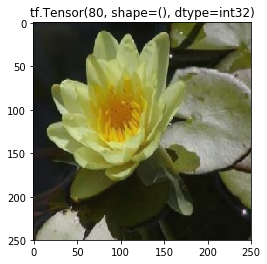

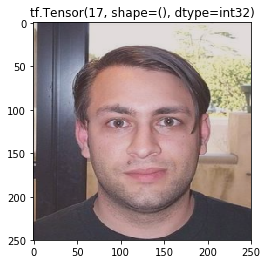

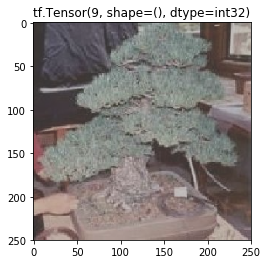

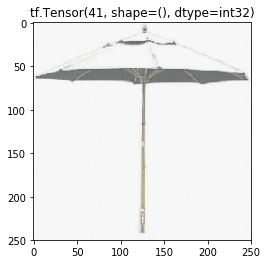

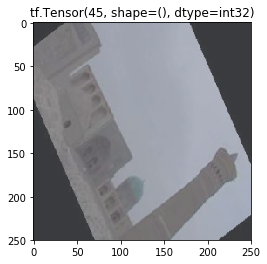

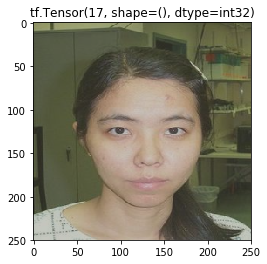

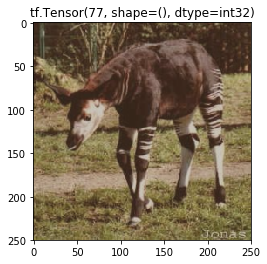

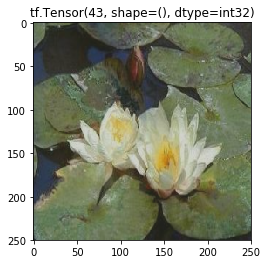

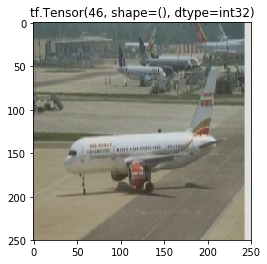

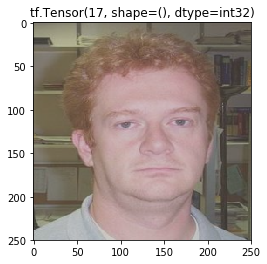

In [98]:
for example_x, example_y in full_ds.take(10):
  plt.figure()
  plt.title(example_y[0])
  plt.imshow(example_x[0].numpy())
  
plt.show()

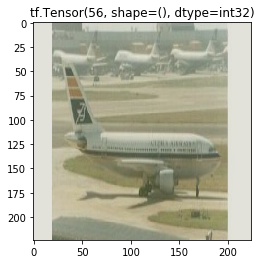

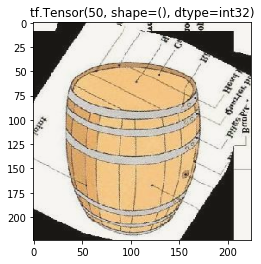

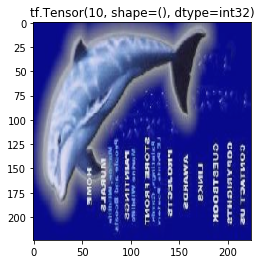

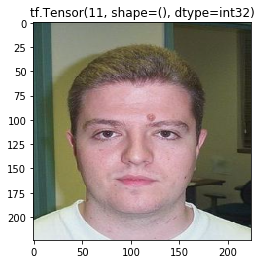

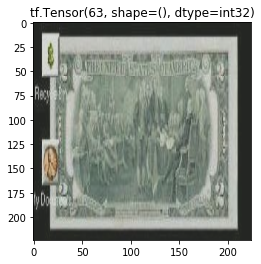

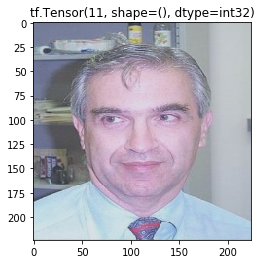

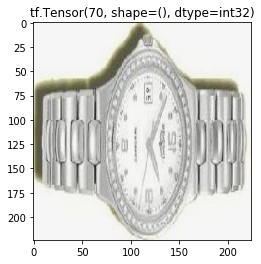

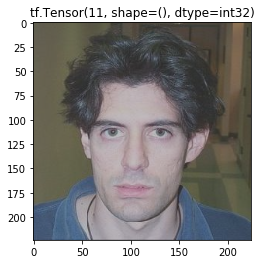

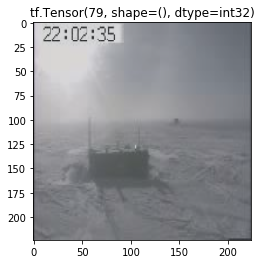

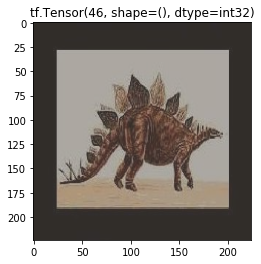

* Importez un modèle pré-entrainé dans Github en utilisant [`tf.keras.applications`](https://www.tensorflow.org/api_docs/python/tf/keras/applications). Nous vous conseillons d'utiliser `MobileNetV2`. 

NB : N'oubliez pas de donner la bonne `input_shape`, de ne pas prendre la dernière _layer_ et d'importer les poids de `imagenet`

In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights = "imagenet"
                                               )

9412608/9406464 [==============================] - 0s 0us/step


* Paramétrez les poids de votre modèle importé comme non-entrainable 

In [0]:
base_model.trainable = False

* Créez maintenant votre modèle complet en ajoutant la dernière couche adaptée à votre situation 

In [0]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(labels), activation="softmax") #nombre de classes qu'on veut en sortie du réseau de neurones
])

* Créez un _learning rate schedule_ via [`tf.keras.optimizers.schedules`](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules)

In [0]:
# Créons un learning rate schedule pour décroitre le learning rate à mesure que nous entrainons le modèle 
initial_learning_rate = 0.0005

lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate,
    decay_steps=6000,
    decay_rate=0.95,
    staircase=True)

* Créez un compileur via [`compile`](https://www.tensorflow.org/api_docs/python/tf/keras/Model#compile)

In [0]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = lr_schedule),
              loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics = [tf.keras.metrics.SparseCategoricalAccuracy()])

* Nous allons maintenant splitter notre `full_ds` en un `train_set` et un `test_set`. Vous choisirez un split 80/20. Pour vous aider, vous pouvez utiliser les méthodes : [`take`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#take) et [`skip`](https://www.tensorflow.org/api_docs/python/tf/data/Dataset#skip)

In [39]:
#l = len(list(full_ds))
l = int(0.8*len(all_image_paths)/16)
l 

457

In [0]:
train_set = full_ds.take(l)
test_set = full_ds.skip(l)

* Fittez votre modèle et enregistrez chacune des épochs dans une variable `history`. Ajoutez aussi l'argument `validation_data` dans lequel vous y insérerez votre `test_set`

In [41]:
history = model.fit(train_set, validation_data= test_set, epochs=5)

Epoch 1/5
457/457 [==============================] - 90s 197ms/step - loss: 1.6816 - sparse_categorical_accuracy: 0.6573 - val_loss: 0.8248 - val_sparse_categorical_accuracy: 0.7987
Epoch 2/5
457/457 [==============================] - 83s 183ms/step - loss: 0.4387 - sparse_categorical_accuracy: 0.9115 - val_loss: 0.6318 - val_sparse_categorical_accuracy: 0.8358
Epoch 3/5
457/457 [==============================] - 84s 183ms/step - loss: 0.2534 - sparse_categorical_accuracy: 0.9508 - val_loss: 0.5647 - val_sparse_categorical_accuracy: 0.8483
Epoch 4/5
457/457 [==============================] - 84s 184ms/step - loss: 0.1681 - sparse_categorical_accuracy: 0.9722 - val_loss: 0.5368 - val_sparse_categorical_accuracy: 0.8587
Epoch 5/5
457/457 [==============================] - 83s 183ms/step - loss: 0.1193 - sparse_categorical_accuracy: 0.9828 - val_loss: 0.5280 - val_sparse_categorical_accuracy: 0.8527


Epoch 1/15


W0710 14:37:35.378295 139698554795904 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


457/457 [==============================] - 78s 171ms/step - loss: 3.3898 - sparse_categorical_accuracy: 0.2690 - val_loss: 2.4410 - val_sparse_categorical_accuracy: 0.4910
Epoch 2/15
457/457 [==============================] - 62s 135ms/step - loss: 1.8660 - sparse_categorical_accuracy: 0.6381 - val_loss: 1.5617 - val_sparse_categorical_accuracy: 0.6885
Epoch 3/15
457/457 [==============================] - 63s 138ms/step - loss: 1.1972 - sparse_categorical_accuracy: 0.7980 - val_loss: 1.1352 - val_sparse_categorical_accuracy: 0.7610
Epoch 4/15
457/457 [==============================] - 59s 130ms/step - loss: 0.8397 - sparse_categorical_accuracy: 0.8656 - val_loss: 0.9235 - val_sparse_categorical_accuracy: 0.7987
Epoch 5/15
457/457 [==============================] - 59s 130ms/step - loss: 0.6416 - sparse_categorical_accuracy: 0.8974 - val_loss: 0.7960 - val_sparse_categorical_accuracy: 0.8101
Epoch 6/15
457/457 [==============================] - 59s 129ms/step - loss: 0.5152 - sparse_cat

* Visualisez votre `accuracy` votre `train` et sur votre `test 

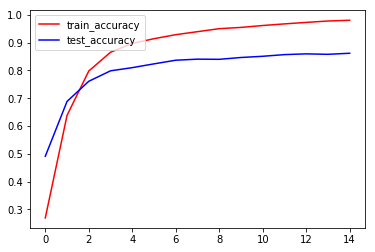

* Faites de même pour votre `loss`

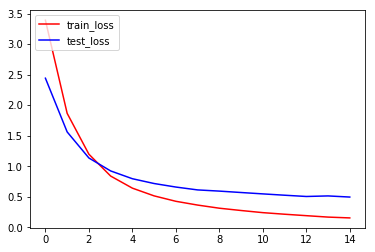

* Comptez le nombre de _layers_ de votre modèle pré-entrainé

155

* Débloquez une trentaine de couches à l'entrainement 

* Recréez un compileur 

* Entrainez à nouveau votre modèle pour effectuer votre _fine tuning_ 

Epoch 1/15
457/457 [==============================] - 94s 206ms/step - loss: 0.1460 - sparse_categorical_accuracy: 0.9649 - val_loss: 0.4877 - val_sparse_categorical_accuracy: 0.8652
Epoch 2/15
457/457 [==============================] - 76s 167ms/step - loss: 0.0198 - sparse_categorical_accuracy: 0.9979 - val_loss: 0.4041 - val_sparse_categorical_accuracy: 0.8936
Epoch 3/15
457/457 [==============================] - 77s 169ms/step - loss: 0.0101 - sparse_categorical_accuracy: 0.9984 - val_loss: 0.3802 - val_sparse_categorical_accuracy: 0.8985
Epoch 4/15
457/457 [==============================] - 78s 170ms/step - loss: 0.0039 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.3668 - val_sparse_categorical_accuracy: 0.8942
Epoch 5/15
457/457 [==============================] - 74s 163ms/step - loss: 0.0026 - sparse_categorical_accuracy: 0.9999 - val_loss: 0.3538 - val_sparse_categorical_accuracy: 0.9002
Epoch 6/15
457/457 [==============================] - 74s 161ms/step - loss: 0.0014 -

* Visualisez votre `accuracy` sur votre `train` et sur votre `test`

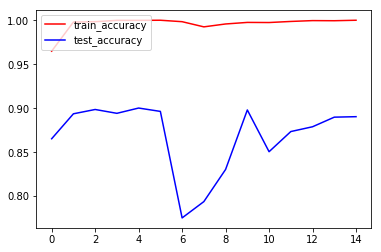

* Faites de mêm

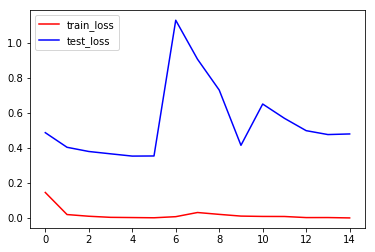